# Liver Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# from sklearn.compose import ColumnTransformer
# ## encoding categorical data
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier

## Importing the Dataset 

In [5]:
dataset = pd.read_csv("C://Users//maitrik//Desktop//HealthCare//DataSet//Liver.csv")

In [6]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
dataset.shape


(583, 11)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
dataset["Albumin_and_Globulin_Ratio"] = dataset.Albumin_and_Globulin_Ratio.fillna(dataset['Albumin_and_Globulin_Ratio'].mean())

In [11]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Visualising the DataSet

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


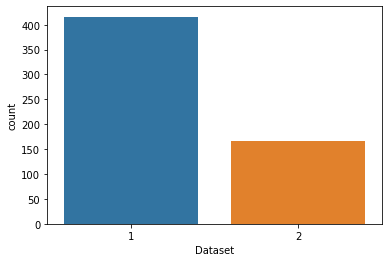

In [12]:
sns.countplot(data=dataset, x = 'Dataset', label='Count')

LD, NLD = dataset['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


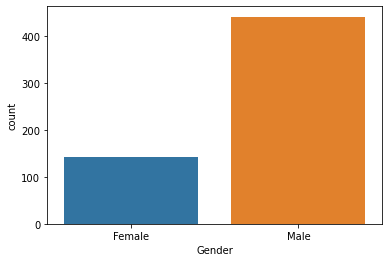

In [13]:
sns.countplot(data=dataset, x = 'Gender', label='Count')

M, F = dataset['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

<AxesSubplot:xlabel='Gender', ylabel='count'>

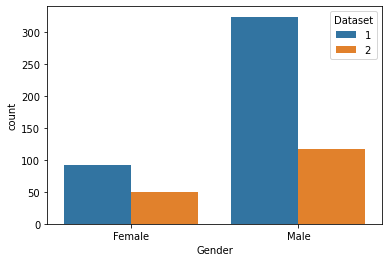

In [14]:
sns.countplot(x = 'Gender', data = dataset, hue = 'Dataset')

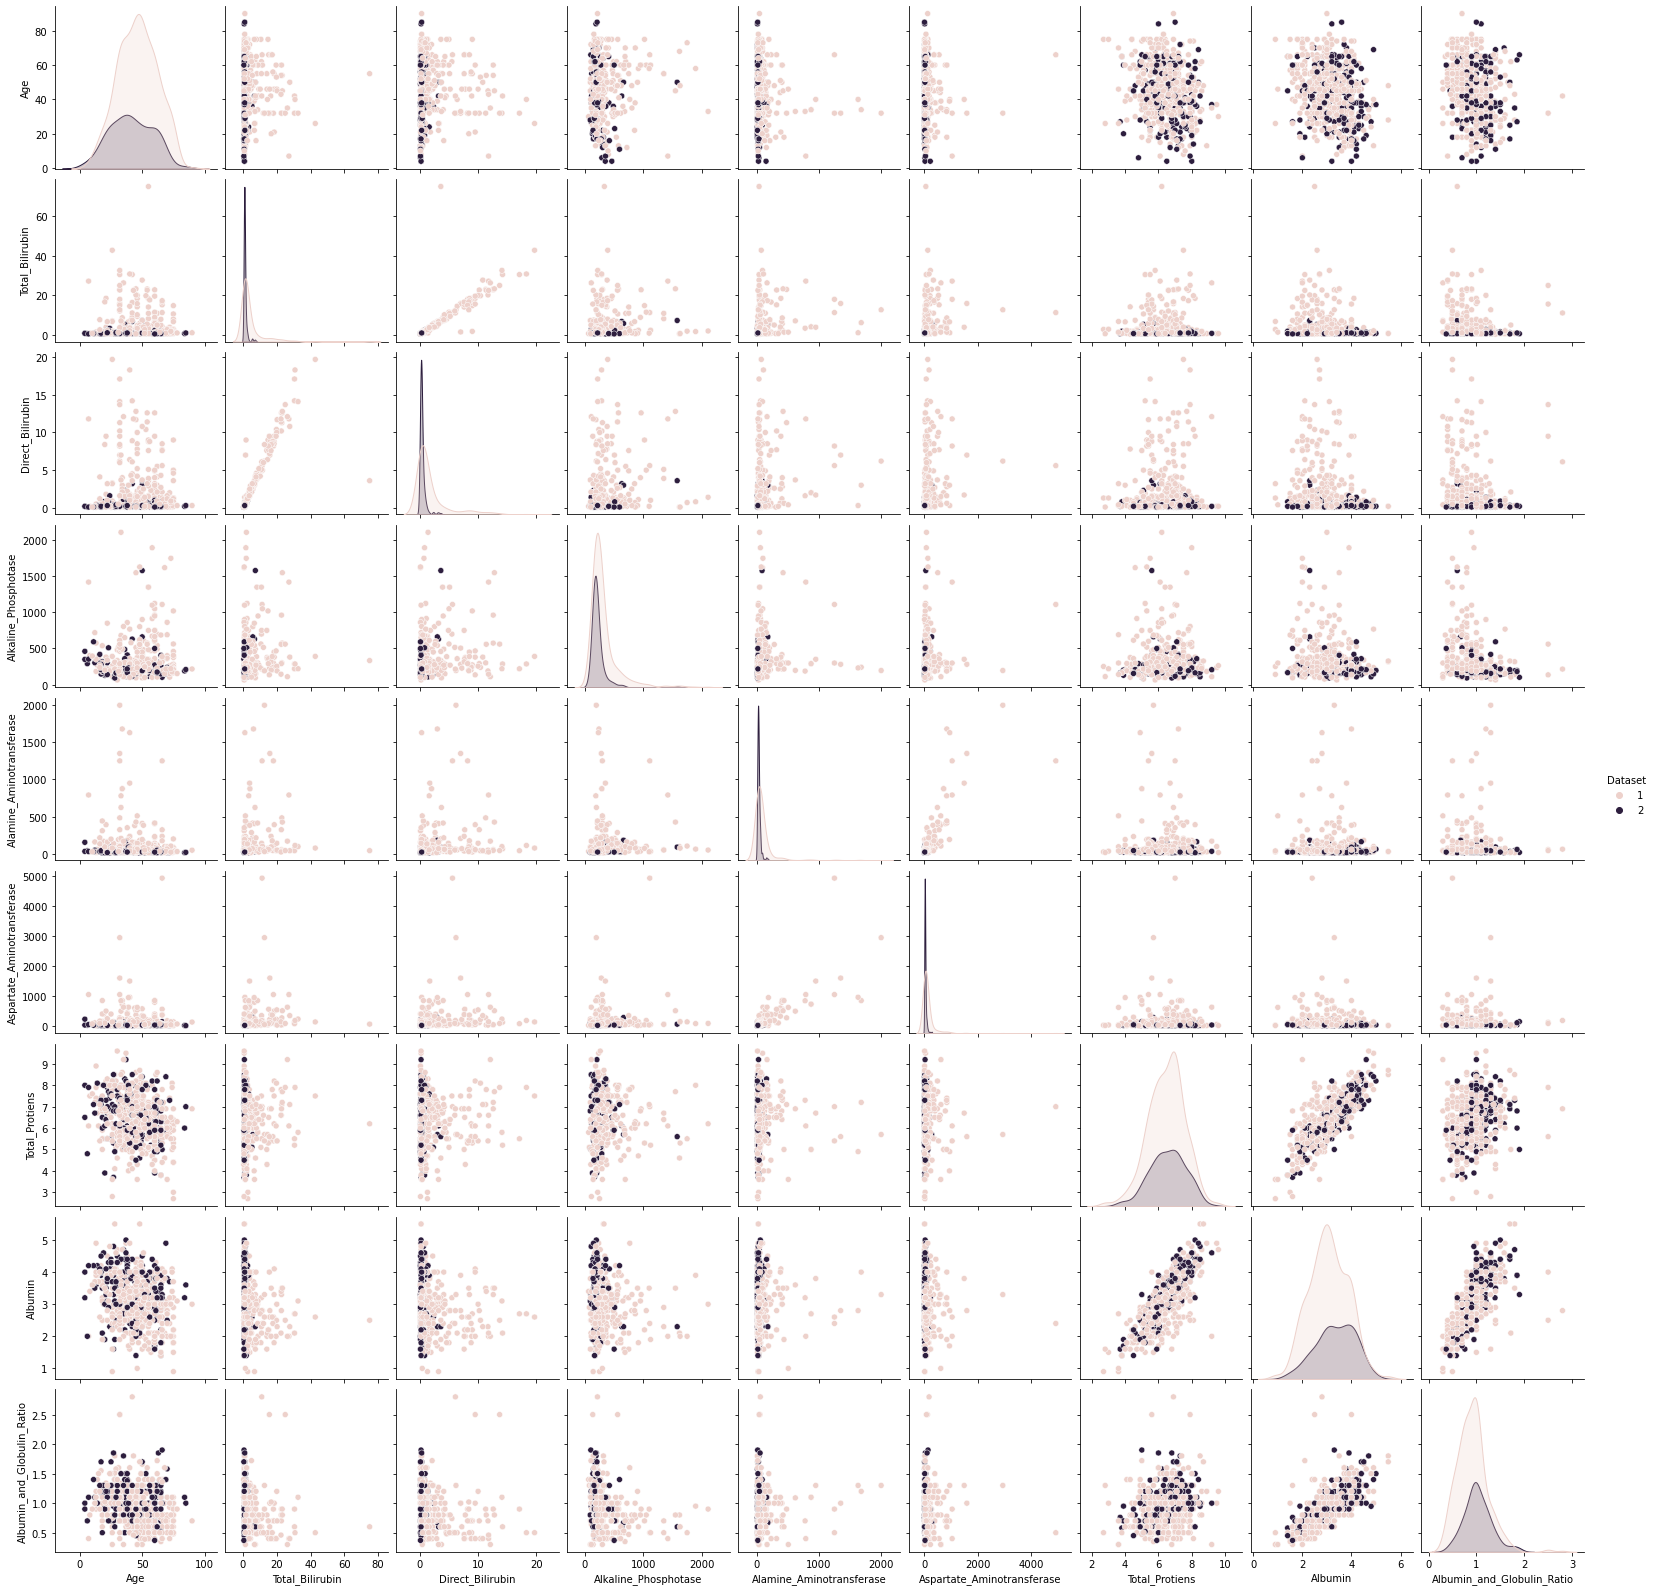

In [15]:
sns.pairplot(dataset,hue='Dataset')

<AxesSubplot:>

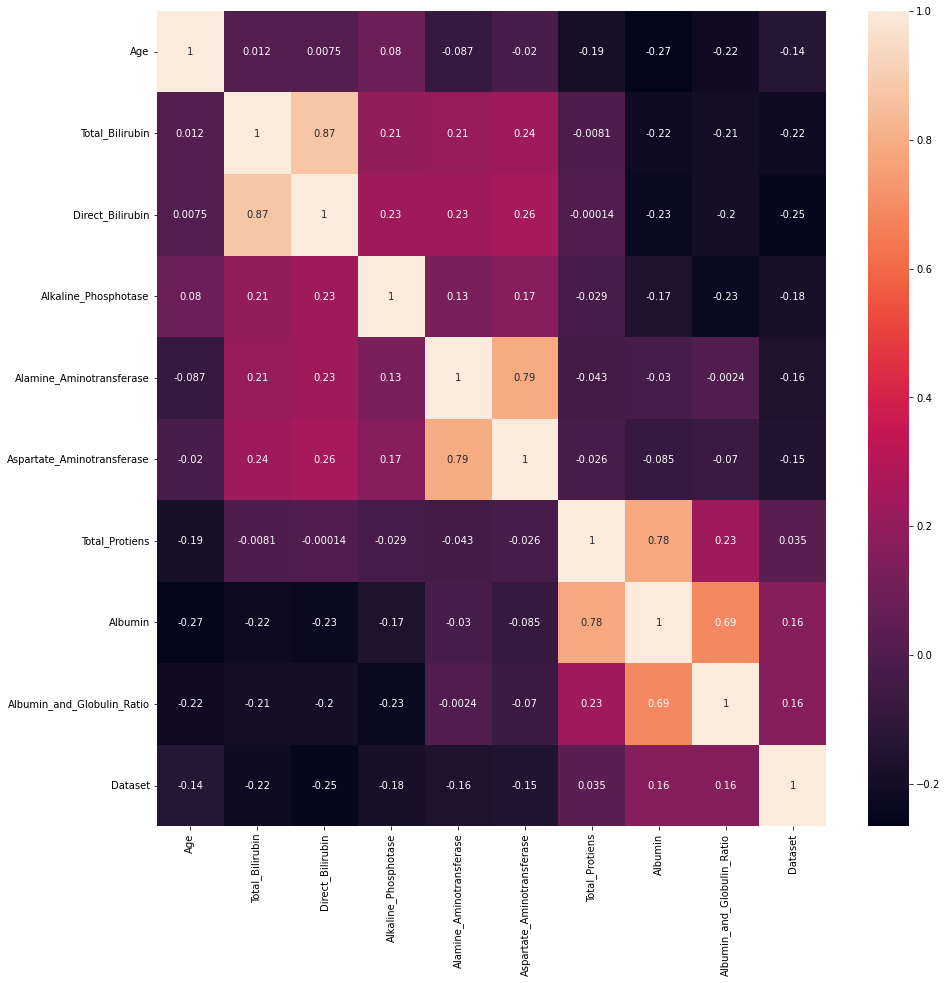

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(dataset.corr(), annot = True)

In [17]:
X = dataset.drop(columns =['Dataset'],axis = 1)
y = dataset['Dataset']
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [19]:
y = y.replace(2, 0)

In [20]:
X = pd.get_dummies(X,columns=['Gender'])
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [21]:
from imblearn.over_sampling import SMOTE
smk = SMOTE(random_state = 42)
X, y = smk.fit_resample(X,y)
X.shape, y.shape

((832, 11), (832,))

In [22]:
x_train,x_test,y_train,y_test =  train_test_split(X,y, test_size = 0.3, random_state = 10)

## Model Training (Random Forest)

In [27]:
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(x_train, y_train)


In [31]:
predict_train_data = model.predict(x_test)

In [36]:
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[100,  20],
       [ 29, 101]], dtype=int64)

In [38]:
report = classification_report(y_test,predict_train_data)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       120
           1       0.83      0.78      0.80       130

    accuracy                           0.80       250
   macro avg       0.80      0.81      0.80       250
weighted avg       0.81      0.80      0.80       250



## Model Training and Testing (XGB boost)

In [41]:
! pip install xgboost
from xgboost import XGBClassifier

xg_model = XGBClassifier(random_state=42)
model_1 = xg_model.fit(x_train, y_train)

predict_train_data = model_1.predict(x_test)

In [42]:
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[101,  19],
       [ 28, 102]], dtype=int64)

In [43]:
report = classification_report(y_test,predict_train_data)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       120
           1       0.84      0.78      0.81       130

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



## Model Training and Testing (Extra Trees Classifier)

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

model_2 = ExtraTreesClassifier(random_state=123)
model_2.fit(x_train, y_train)
predict_train_data = model_2.predict(x_test)

In [46]:
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[102,  18],
       [ 28, 102]], dtype=int64)

In [47]:
report = classification_report(y_test,predict_train_data)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       120
           1       0.85      0.78      0.82       130

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



## Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV, KFold

# Extra Tree
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs3.fit(x_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)

Best score: 0.8908194409516358
Best score: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


C:\Users\maitrik\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maitrik\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maitrik\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\maitrik\Anaconda3\lib\site-packages\joblib\parallel.py", line 1056, in __call__
    self.retrieve()
  File "C:\Users\maitrik\Anaconda3\lib\site-packages\joblib\par

In [49]:
predict_train_data = gs3.predict(x_test)

In [50]:
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[104,  16],
       [ 25, 105]], dtype=int64)

In [51]:
report = classification_report(y_test,predict_train_data)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       120
           1       0.87      0.81      0.84       130

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 60 to 265
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Total_Bilirubin             582 non-null    float64
 2   Direct_Bilirubin            582 non-null    float64
 3   Alkaline_Phosphotase        582 non-null    int64  
 4   Alamine_Aminotransferase    582 non-null    int64  
 5   Aspartate_Aminotransferase  582 non-null    int64  
 6   Total_Protiens              582 non-null    float64
 7   Albumin                     582 non-null    float64
 8   Albumin_and_Globulin_Ratio  582 non-null    float64
 9   Gender_Female               582 non-null    uint8  
 10  Gender_Male                 582 non-null    uint8  
dtypes: float64(5), int64(4), uint8(2)
memory usage: 46.6 KB


In [53]:
maxValues = dataset.max()
 
print(maxValues)

Age                             90
Gender                        Male
Total_Bilirubin               75.0
Direct_Bilirubin              19.7
Alkaline_Phosphotase          2110
Alamine_Aminotransferase      2000
Aspartate_Aminotransferase    4929
Total_Protiens                 9.6
Albumin                        5.5
Albumin_and_Globulin_Ratio     2.8
Dataset                          2
dtype: object


In [54]:
minValues = dataset.min()
 
print(minValues)

Age                                4
Gender                        Female
Total_Bilirubin                  0.4
Direct_Bilirubin                 0.1
Alkaline_Phosphotase              63
Alamine_Aminotransferase          10
Aspartate_Aminotransferase        10
Total_Protiens                   2.7
Albumin                          0.9
Albumin_and_Globulin_Ratio       0.3
Dataset                            1
dtype: object


In [55]:
import pickle
pickle.dump(gs3, open("liver.pkl",'wb'))